# Feature Engineering


# Data Importing

In [1]:
import pandas as pd
house_price_data=pd.read_csv("data/kc_house_data.csv")

In [2]:
house_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  


1. Print columns names
2. prepare the train and test data

In [3]:
house_price_data.columns.values

array(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype=object)

In [4]:
pred_cols=house_price_data.columns.values[3:]
print(pred_cols)

['bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors' 'waterfront'
 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement' 'yr_built'
 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15' 'sqft_lot15']


In [5]:
X = house_price_data[pred_cols]
y = house_price_data['price']

from sklearn  import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,train_size=0.8, random_state=55)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(17290, 18)
(17290,)
(4323, 18)
(4323,)


# Basic Model

## Model1 with all numerical columns

In [6]:
from  sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

RSquared and MAPE

In [10]:
#Rsquared value on train and test data
from sklearn import metrics
y_pred_train=model1.predict(X_train)
print("Train RSquared", metrics.r2_score(y_train,y_pred_train))

y_pred_test=model1.predict(X_test)
print("Test RSquared",metrics.r2_score(y_test,y_pred_test))

import numpy as np
#MAPE
print("MAPE on Train data : ", round(np.mean(np.abs(y_train - y_pred_train)/y_train),2))
print("MAPE on Test data : ", round(np.mean(np.abs(y_test - y_pred_test)/y_test),2))


Train RSquared 0.7004310823997761
Test RSquared 0.696436288004112
MAPE on Train data :  0.26
MAPE on Test data :  0.26


# Handling Date variables

In [11]:
date_vars = ['date', 'yr_built', 'yr_renovated']
house_price_dates=house_price_data[date_vars]
house_price_dates.head()

,date,yr_built,yr_renovated
0,20141013T000000,1910,1987
1,20140611T000000,1940,2001
2,20140919T000000,2001,0
3,20140804T000000,2001,0
4,20150413T000000,2009,0


In [12]:
house_price_dates['sale_year'] = np.int64([d[0:4] for d in house_price_dates["date"]])
house_price_dates['sale_month'] = np.int64([d[4:6] for d in house_price_dates["date"]])
house_price_dates['day_sold'] = np.int64([d[6:8] for d in house_price_dates["date"]])
house_price_dates['age_of_house'] = house_price_dates['sale_year'] - house_price_dates['yr_built']
house_price_dates['Ind_renovated'] = house_price_dates['yr_renovated']>0
house_price_dates.head()

C:\Users\WIN-10\AppData\Local\Temp\ipykernel_14884\1169987464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_price_dates['sale_year'] = np.int64([d[0:4] for d in house_price_dates["date"]])
C:\Users\WIN-10\AppData\Local\Temp\ipykernel_14884\1169987464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_price_dates['sale_month'] = np.int64([d[4:6] for d in house_price_dates["date"]])
C:\Users\WIN-10\AppData\Local\Temp\ipykernel_14884\1169987464.py:3: SettingWithCopyWarning: 
A value is tryin

,date,yr_built,yr_renovated,sale_year,sale_month,day_sold,age_of_house,Ind_renovated
0,20141013T000000,1910,1987,2014,10,13,104,True
1,20140611T000000,1940,2001,2014,6,11,74,True
2,20140919T000000,2001,0,2014,9,19,13,False
3,20140804T000000,2001,0,2014,8,4,13,False
4,20150413T000000,2009,0,2015,4,13,6,False


In [13]:
house_price_dates1=house_price_dates.drop(date_vars, axis=1) #keep only newly derived variables
house_price_data_dates=house_price_data.join(house_price_dates1)
house_price_data_dates.shape

(21613, 26)

## Model2 with Date columns

In [14]:
col_names = house_price_data_dates.columns.values
#print(col_names)

x_col_names=col_names[3:]
print(x_col_names)

X = house_price_data_dates[x_col_names]
y = house_price_data_dates['price']

from sklearn  import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,test_size=0.2, random_state=55)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


['bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors' 'waterfront'
 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement' 'yr_built'
 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15' 'sqft_lot15'
 'sale_year' 'sale_month' 'day_sold' 'age_of_house' 'Ind_renovated']
(17290, 23)
(17290,)
(4323, 23)
(4323,)


In [15]:
import sklearn
model2 = sklearn.linear_model.LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [16]:
#Rsquared Calculation on Train data
from sklearn import metrics
y_pred_train=model2.predict(X_train)
print("Train data R-Squared : ", metrics.r2_score(y_train,y_pred_train))

#Rsquared Calculation on test data
y_pred_test=model2.predict(X_test)
print("Test data R-Squared : " , metrics.r2_score(y_test,y_pred_test))

Train data R-Squared :  0.7031095708216482
Test data R-Squared :  0.6984175384447081


In [17]:
#MAPE
print("MAPE on Train data : ", round(np.mean(np.abs(y_train - y_pred_train)/y_train),2))
print("MAPE on Test data : ", round(np.mean(np.abs(y_test - y_pred_test)/y_test),2))

MAPE on Train data :  0.26
MAPE on Test data :  0.26


# Handling Geo location(Lat-Long) Variables

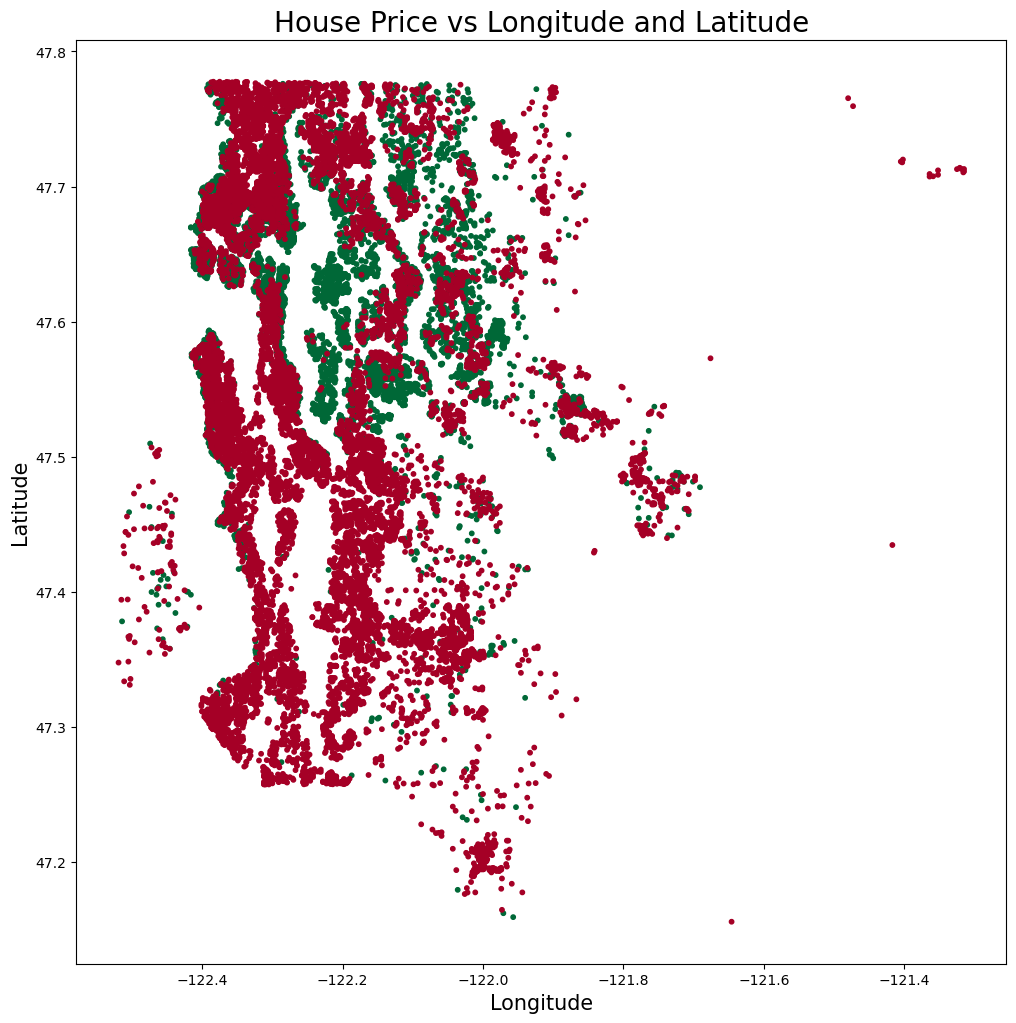

In [25]:
###' House Price versus Longitude and Latitude'
bubble_col= house_price_data["price"] > house_price_data["price"].quantile(0.7)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.scatter(house_price_data["long"],house_price_data["lat"], c=bubble_col,cmap="RdYlGn",s=10)
plt.title('House Price vs Longitude and Latitude', fontsize=20)
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.show()


## High price houses center

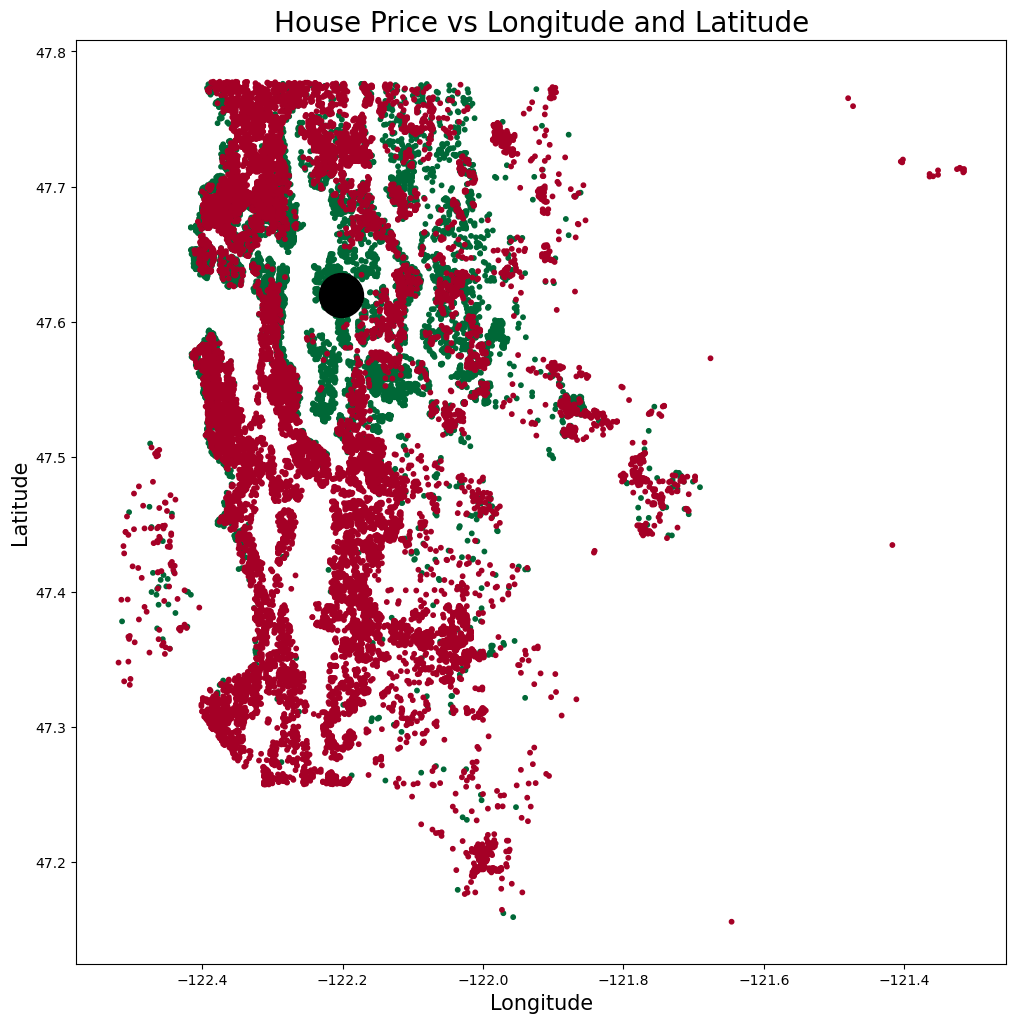

In [26]:
high_long_mean=house_price_data["long"][bubble_col].mean()
high_lat_mean=house_price_data["lat"][bubble_col].mean()

plt.figure(figsize=(12,12))
plt.scatter(house_price_data["long"],house_price_data["lat"], c=bubble_col,cmap="RdYlGn",s=10)
plt.scatter(high_long_mean,high_lat_mean, c="black", s=1000)

plt.title('House Price vs Longitude and Latitude', fontsize=20)
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.show()

Distance from high priced houses center to every house

Text(0, 0.5, 'log(house price)')

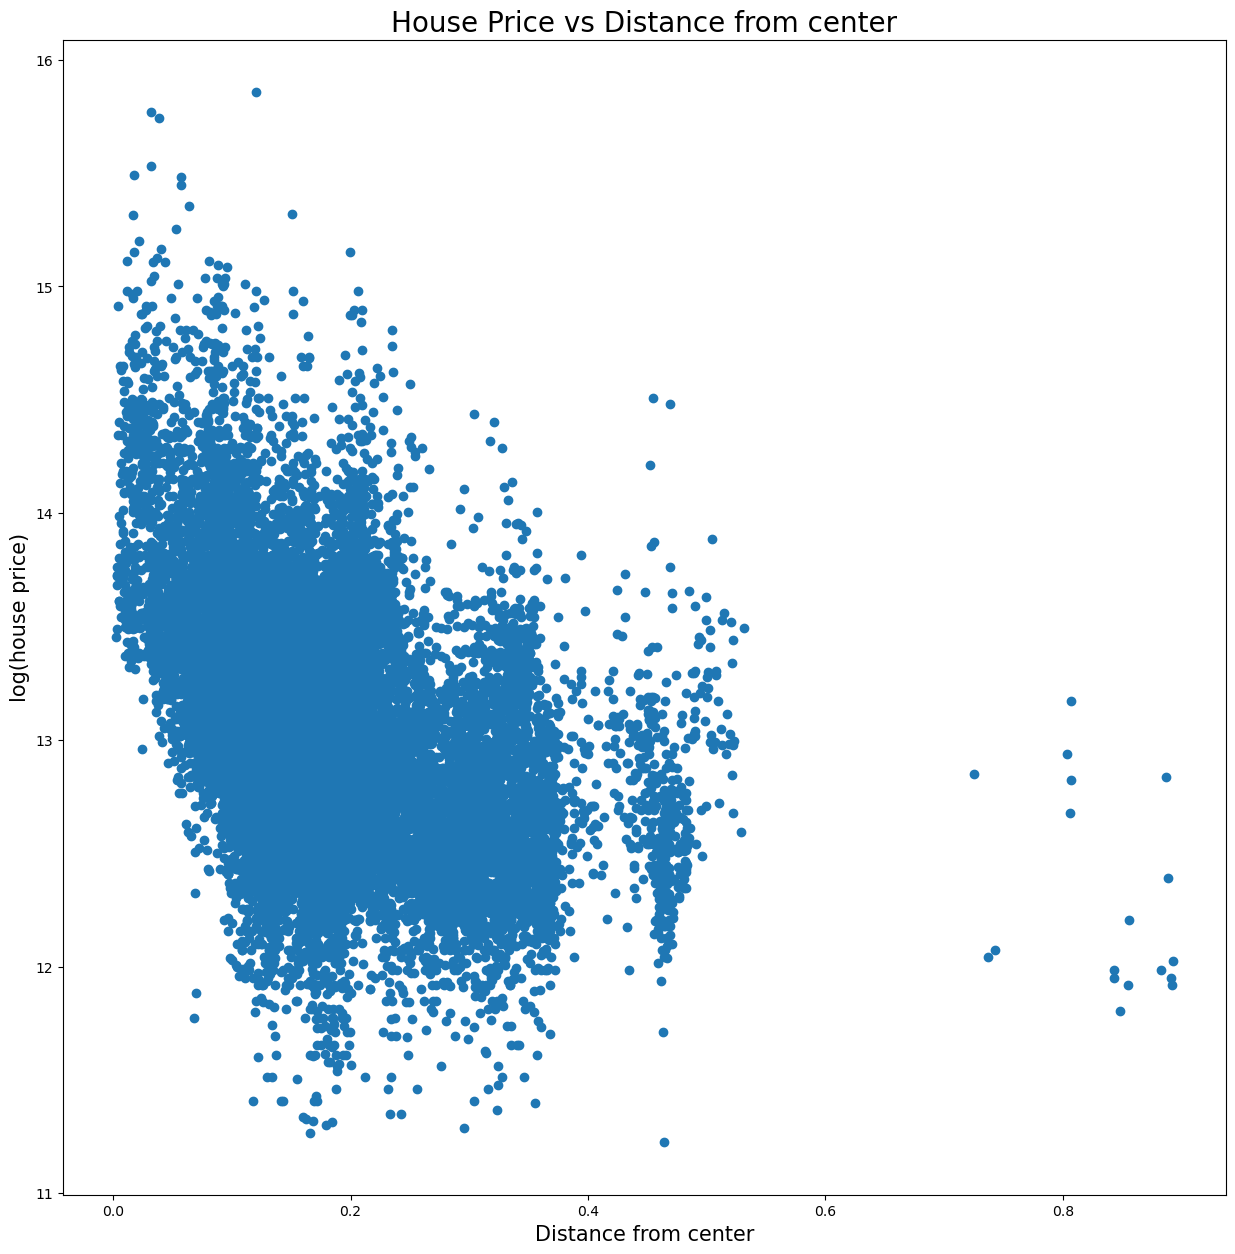

In [27]:
##Distance from high priced houses center to every house
house_price_data["High_cen_distance"]=np.sqrt((house_price_data["long"] - high_long_mean) ** 2 + (house_price_data["lat"] - high_lat_mean) ** 2)

plt.figure(figsize=(15,15))
plt.scatter(house_price_data["High_cen_distance"],np.log(house_price_data["price"]))
plt.title('House Price vs Distance from center', fontsize=20)
plt.xlabel('Distance from center', fontsize=15)
plt.ylabel('log(house price)', fontsize=15)


## Model3 With Geo variable treatment

In [28]:
#Defining X data
col_names = house_price_data.columns.values
print(col_names)

x_col_names=col_names[3:]
print(x_col_names)

X = house_price_data[x_col_names]
y = house_price_data['price']

from sklearn  import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,test_size=0.2, random_state=55)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

import sklearn
model3 = sklearn.linear_model.LinearRegression()
model3.fit(X_train, y_train)




['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15' 'High_cen_distance']
['bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors' 'waterfront'
 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement' 'yr_built'
 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15' 'sqft_lot15'
 'High_cen_distance']
(17290, 19)
(17290,)
(4323, 19)
(4323,)


LinearRegression()

In [30]:
#Rsquared Calculation on Train data
from sklearn import metrics
y_pred_train=model3.predict(X_train)
print("Train data R-Squared : ", metrics.r2_score(y_train,y_pred_train))

#Rsquared Calculation on test data
y_pred_test=model3.predict(X_test)
print("Test data R-Squared : " , metrics.r2_score(y_test,y_pred_test))
#MAPE
print("MAPE on Train data : ", round(np.mean(np.abs(y_train - y_pred_train)/y_train),2))
print("MAPE on Test data : ", round(np.mean(np.abs(y_test - y_pred_test)/y_test),2))


Train data R-Squared :  0.7148088489464606
Test data R-Squared :  0.709061092503455
MAPE on Train data :  0.26
MAPE on Test data :  0.26


## Seattle City indicator

Text(0, 0.5, 'log(house price)')

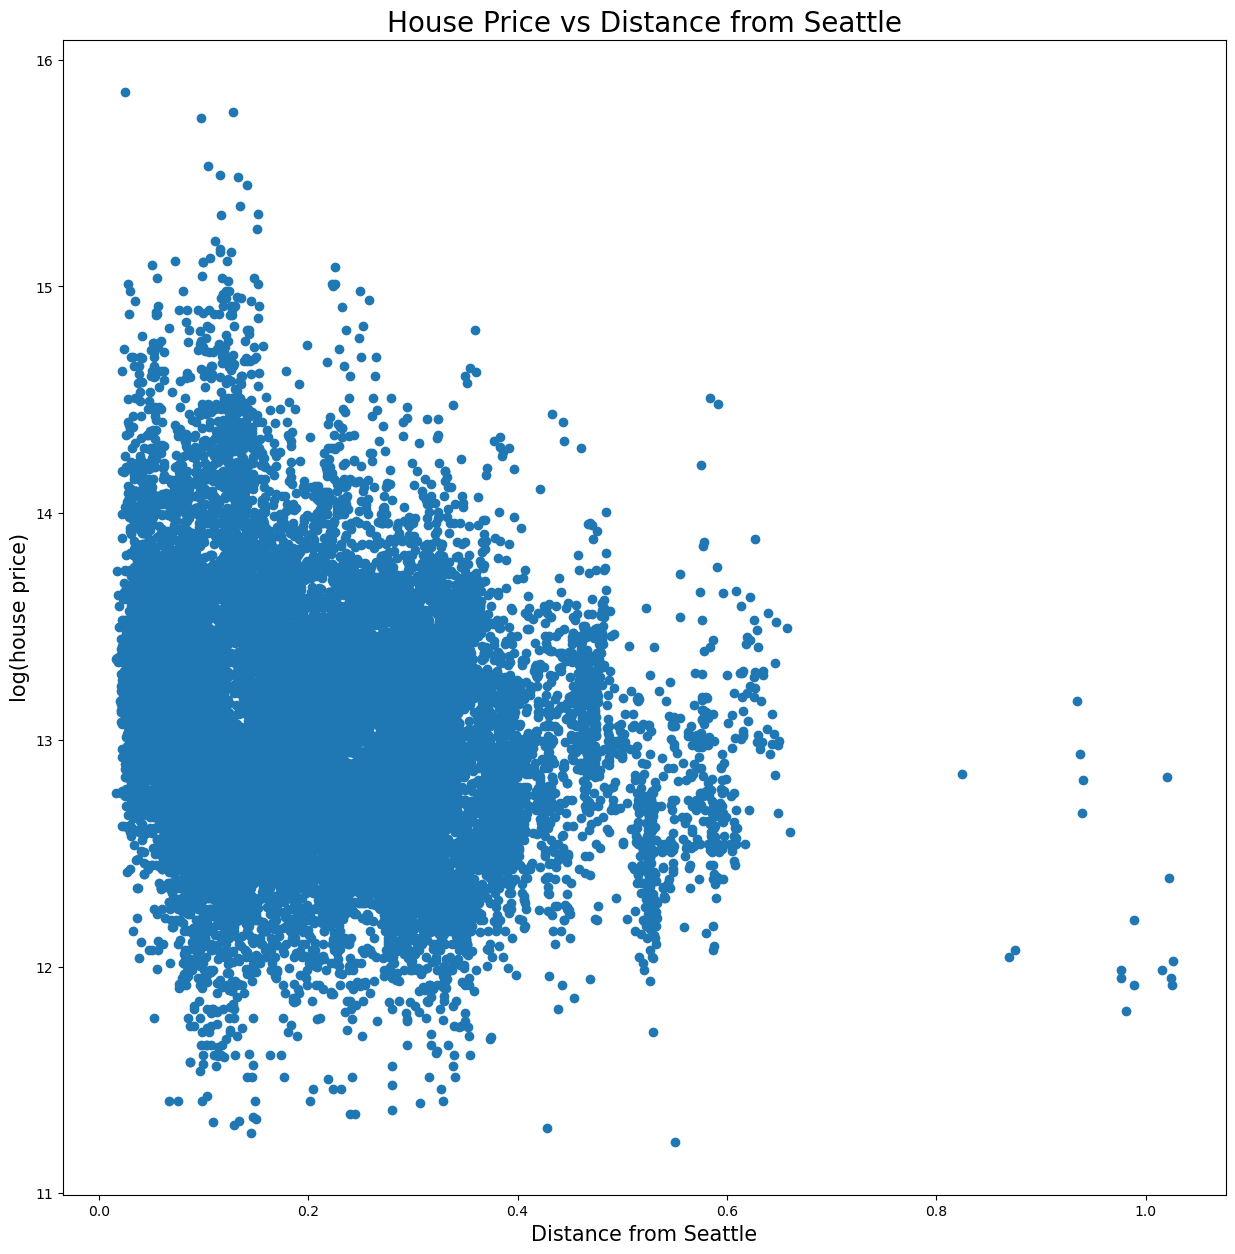

In [31]:
# Seattle is Washington State’s largest city
Seattle_Longitude=	-122.335167
Seattle_Latitude=	47.608013

##Distance from Seattle to every house
house_price_data["Seattle_distance"]=np.sqrt((house_price_data["long"] - Seattle_Longitude) ** 2 + (house_price_data["lat"] - Seattle_Latitude) ** 2)

plt.figure(figsize=(15,15))
plt.scatter(house_price_data["Seattle_distance"],np.log(house_price_data["price"]))
plt.title('House Price vs Distance from Seattle', fontsize=20)
plt.xlabel('Distance from Seattle', fontsize=15)
plt.ylabel('log(house price)', fontsize=15)


In [32]:
#Defining X data
col_names = house_price_data.columns.values
print(col_names)

x_col_names=col_names[3:]
print(x_col_names)

X = house_price_data[x_col_names]
y = house_price_data['price']

from sklearn  import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,test_size=0.2, random_state=55)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

import sklearn
model3 = sklearn.linear_model.LinearRegression()
model3.fit(X_train, y_train)

#Rsquared Calculation on Train data
from sklearn import metrics
y_pred_train=model3.predict(X_train)
print("Train data R-Squared : ", metrics.r2_score(y_train,y_pred_train))

#Rsquared Calculation on test data
y_pred_test=model3.predict(X_test)
print("Test data R-Squared : " , metrics.r2_score(y_test,y_pred_test))
#MAPE
print("MAPE on Train data : ", round(np.mean(np.abs(y_train - y_pred_train)/y_train),2))
print("MAPE on Test data : ", round(np.mean(np.abs(y_test - y_pred_test)/y_test),2))



['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15' 'High_cen_distance' 'Seattle_distance']
['bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors' 'waterfront'
 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement' 'yr_built'
 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15' 'sqft_lot15'
 'High_cen_distance' 'Seattle_distance']
(17290, 20)
(17290,)
(4323, 20)
(4323,)
Train data R-Squared :  0.729466843836768
Test data R-Squared :  0.7256794708495946
MAPE on Train data :  0.25
MAPE on Test data :  0.25


In [ ]:
#Seattle_Longitude=	-122.335167
#Seattle_Latitude=	47.608013
#!pip install geopy
#from geopy.geocoders import Nominatim
#geolocator = Nominatim(user_agent="geoapiExercises")
#def city_state_country(coord):
#    location = geolocator.reverse(coord, exactly_one=True)
#    address = location.raw['address']
#    city = address.get('city', '')
#    state = address.get('state', '')
#    country = address.get('country', '')
#    return city, state, country

# Transformations

Text(0.5, 1.0, 'House Price distribution')

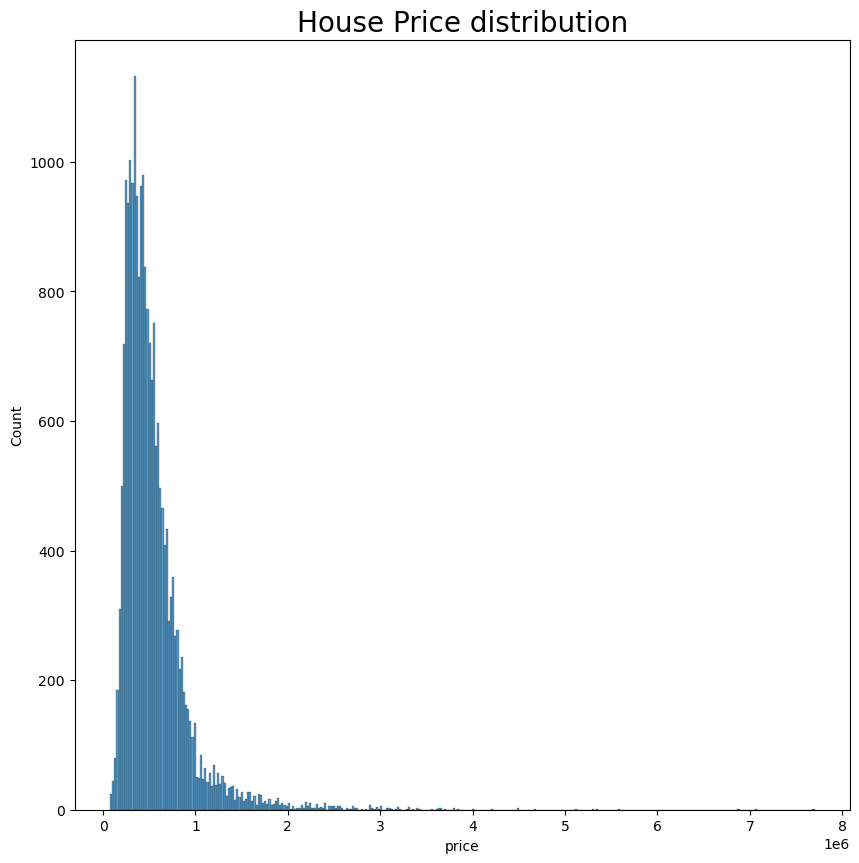

In [34]:
#Histogram on target variable
import seaborn as sns
plt.figure(figsize=(10,10))
sns.histplot(house_price_data["price"])
plt.title('House Price distribution', fontsize=20)

Text(0.5, 1.0, 'log(House Price) distribution')

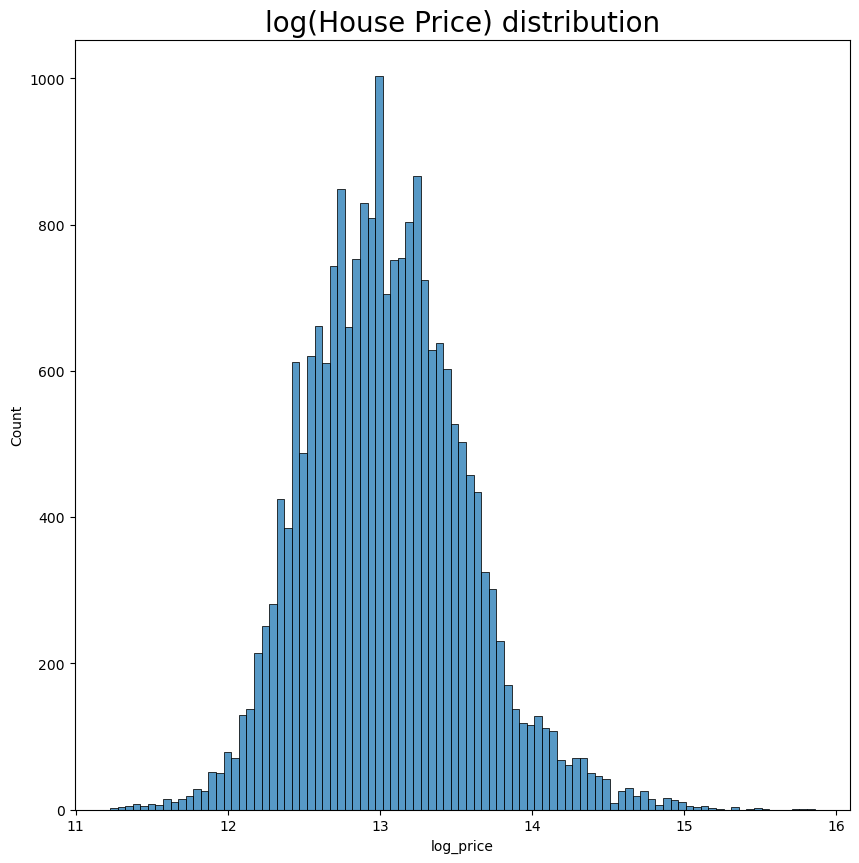

In [36]:
#Log transformation
house_price_data["log_price"]=np.log(house_price_data["price"])
plt.figure(figsize=(10,10))
sns.histplot(house_price_data["log_price"])
plt.title('log(House Price) distribution', fontsize=20)


## Model4 with transformations

In [37]:
###Model building after Transformations
#Defining X data
X = house_price_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

y = house_price_data['log_price']

from sklearn  import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,test_size=0.2, random_state=55)

import sklearn
model4 = sklearn.linear_model.LinearRegression()
model4.fit(X_train, y_train)



LinearRegression()

In [38]:
#Rsquared Calculation on Train data
from sklearn import metrics
y_pred_train=model4.predict(X_train)
print("Train data R-Squared : ", metrics.r2_score(y_train,y_pred_train))

#Rsquared Calculation on test data
y_pred_test=model4.predict(X_test)
print("Test data R-Squared : " , metrics.r2_score(y_test,y_pred_test))

#MAPE
print("MAPE on Train data : ", round(np.mean(np.abs(y_train - y_pred_train)/y_train),4))
print("MAPE on Test data : ", round(np.mean(np.abs(y_test - y_pred_test)/y_test),4))


Train data R-Squared :  0.7718064095694628
Test data R-Squared :  0.7644327349746588
MAPE on Train data :  0.015
MAPE on Test data :  0.015


# One hot encoding

In [ ]:
house_price_data.columns

In [39]:
categorical_cols=['waterfront', 'view', 'condition', 'grade','zipcode']
for col in categorical_cols:
  print(house_price_data[col].value_counts())

0    21450
1      163
Name: waterfront, dtype: int64
0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64
3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64


In [40]:
# get dummy variables
one_hot_data = pd.get_dummies(house_price_data['zipcode'])
#Try all ['view', 'condition', 'grade','zipcode']
print("one_hot_data \n", one_hot_data.sample(10))

one_hot_data 
        98001  98002  98003  98004  98005  98006  98007  98008  98010  98011  \
12994      0      0      0      0      0      0      0      0      0      0   
498        0      0      0      0      0      0      0      0      0      0   
20259      0      0      0      0      0      0      0      0      0      0   
4878       0      0      0      0      0      0      0      0      0      0   
16020      0      0      0      0      0      0      0      0      0      0   
19994      0      0      0      0      0      0      0      0      0      0   
3413       0      0      0      0      0      0      0      0      0      0   
13763      0      0      0      0      0      0      0      0      0      0   
15087      0      0      0      0      0      0      0      0      0      0   
18317      0      0      0      0      0      0      0      0      0      0   

       ...  98146  98148  98155  98166  98168  98177  98178  98188  98198  \
12994  ...      0      0      0      0

In [41]:
# Concatenate dummy columns with main dataframe
house_price_with_dummy = pd.concat([house_price_data, one_hot_data],axis=1)
house_price_with_dummy.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,6762700020,20141013T000000,7700000,6,8.00,12050,27600,2.5,0,3,...,0,0,0,0,0,0,0,0,0,0
1,9808700762,20140611T000000,7062500,5,4.50,10040,37325,2.0,1,2,...,0,0,0,0,0,0,0,0,0,0
2,9208900037,20140919T000000,6885000,6,7.75,9890,31374,2.0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,2470100110,20140804T000000,5570000,5,5.75,9200,35069,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8907500070,20150413T000000,5350000,5,5.00,8000,23985,2.0,0,4,...,0,0,0,0,0,0,0,0,0,0


## Model5 with one hot encoded values

In [42]:
###Model building after Transformations
#Defining X data

prev_cols=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
encoded_cols=list(one_hot_data.columns.values)

all_pred_cols=prev_cols+encoded_cols

X = house_price_with_dummy[all_pred_cols]
X.columns = X.columns.astype(str) #Converting numeric column names into Strings

y = house_price_with_dummy['price']

from sklearn  import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,test_size=0.2, random_state=55)

import sklearn
model5 = sklearn.linear_model.LinearRegression()
model5.fit(X_train, y_train)

LinearRegression()

In [43]:
#Rsquared Calculation on Train data
from sklearn import metrics
y_pred_train=model5.predict(X_train)
print("Train data R-Squared : ", metrics.r2_score(y_train,y_pred_train))

#Rsquared Calculation on test data
y_pred_test=model5.predict(X_test)
print("Test data R-Squared : " , metrics.r2_score(y_test,y_pred_test))

#MAPE
print("MAPE on Train data : ", round(np.mean(np.abs(y_train - y_pred_train)/y_train),4))
print("MAPE on Test data : ", round(np.mean(np.abs(y_test - y_pred_test)/y_test),4))


Train data R-Squared :  0.8091936142419001
Test data R-Squared :  0.8030578764308446
MAPE on Train data :  0.1966
MAPE on Test data :  0.2011


# Binning

## sqft_living vs price

Text(0.5, 0, 'sqft_living')

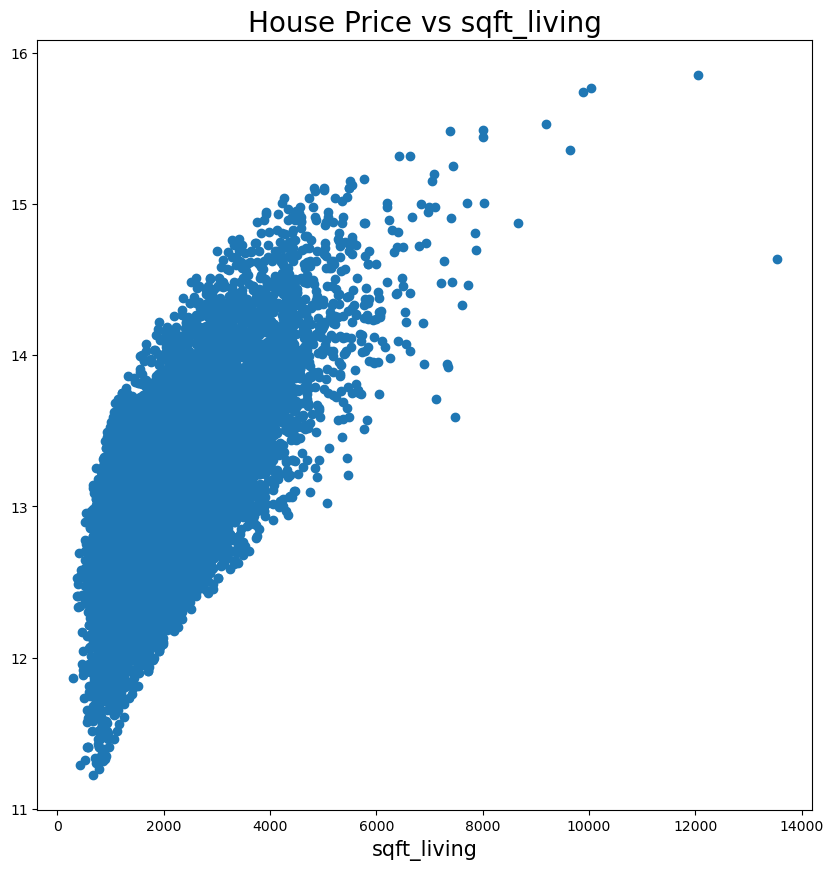

In [44]:
plt.figure(figsize=(10,10))
plt.scatter(house_price_data["sqft_living"],np.log(house_price_data["price"]))
plt.title('House Price vs sqft_living', fontsize=20)
plt.xlabel('sqft_living', fontsize=15)

## Creating bins

In [46]:
house_price_with_dummy['bins'] = pd.qcut(house_price_with_dummy["sqft_living"], q=10)
house_price_with_dummy['bins'].value_counts(sort=False)

(289.999, 1090.0]    2200
(1090.0, 1320.0]     2159
(1320.0, 1520.0]     2192
(1520.0, 1710.0]     2126
(1710.0, 1910.0]     2143
(1910.0, 2130.0]     2158
(2130.0, 2400.0]     2223
(2400.0, 2730.0]     2108
(2730.0, 3250.0]     2143
(3250.0, 13540.0]    2161
Name: bins, dtype: int64

In [47]:
bins_one_hot = pd.get_dummies(house_price_with_dummy['bins'])
data_with_bins_dummy = pd.concat([house_price_with_dummy, bins_one_hot],axis=1)
bins_cols=list(bins_one_hot.columns)

all_pred_cols=prev_cols+encoded_cols+bins_cols

## Model6 with Bins

In [48]:
X = data_with_bins_dummy[all_pred_cols]
y = data_with_bins_dummy['price']

from sklearn  import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,test_size=0.2, random_state=55)

import sklearn
model6 = sklearn.linear_model.LinearRegression()
model6.fit(X_train, y_train)



TypeError: Feature names are only supported if all input features have string names, but your input has ['Interval', 'int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [49]:
#Rsquared Calculation on Train data
from sklearn import metrics
y_pred_train=model6.predict(X_train)
print("Train data R-Squared : ", metrics.r2_score(y_train,y_pred_train))

#Rsquared Calculation on test data
y_pred_test=model6.predict(X_test)
print("Test data R-Squared : " , metrics.r2_score(y_test,y_pred_test))

#MAPE
print("MAPE on Train data : ", round(np.mean(np.abs(y_train - y_pred_train)/y_train),4))
print("MAPE on Test data : ", round(np.mean(np.abs(y_test - y_pred_test)/y_test),4))


NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.